In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from itertools import combinations
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
df = pd.read_csv("pokemon.csv")

In [3]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [4]:
df.shape

(801, 41)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [6]:
# Check for missing values
print(df.isnull().sum())

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


## Handling missing data

In [7]:
# Fill missing numerical values with mean
df['height_m'].fillna(df['height_m'].mean(), inplace=True)
df['weight_kg'].fillna(df['weight_kg'].mean(), inplace=True)
# Assuming 'df' is your DataFrame containing Pokémon data
df['percentage_male'].fillna(0, inplace=True)

# Fill missing categorical values with 'None'
df['type2'].fillna('None', inplace=True)

# Performing exploratory data analysis on the dataset

## Number of pokemons

In [8]:
df["name"].nunique()

801

## Number of legendary and normal pokemons

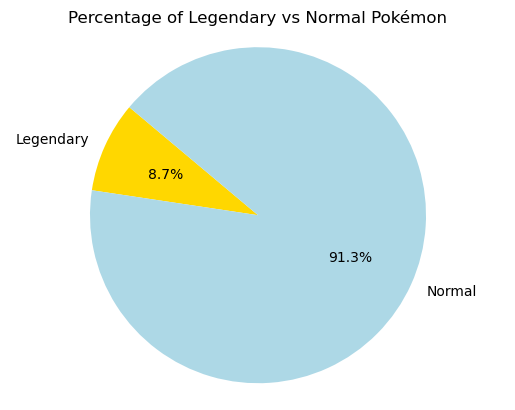

In [9]:
# Categorize Pokémon as legendary or normal
legendary_count = df[df['is_legendary'] == 1]['name'].count()
normal_count = df[df['is_legendary'] == 0]['name'].count()

# Plotting the pie chart
labels = ['Legendary', 'Normal']
counts = [legendary_count, normal_count]
colors = ['gold', 'lightblue']

plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of Legendary vs Normal Pokémon')
plt.show()

## Number of pokemons in each generation

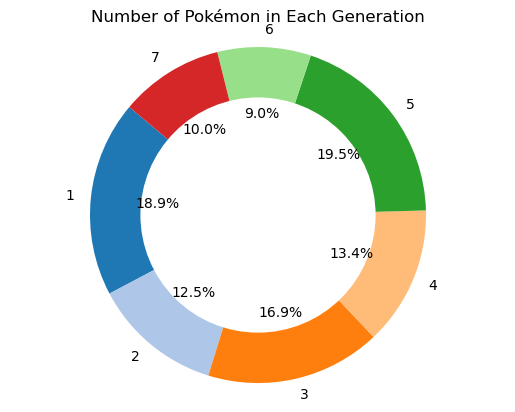

In [10]:
# Grouping the data by generation and counting the number of Pokémon in each generation
pokemon_count_by_generation = df.groupby('generation')['name'].count()

# Plotting the pie chart
plt.pie(pokemon_count_by_generation, labels=pokemon_count_by_generation.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Number of Pokémon in Each Generation')

# Draw a white circle at the center to create a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

## Number of pokemons in each type

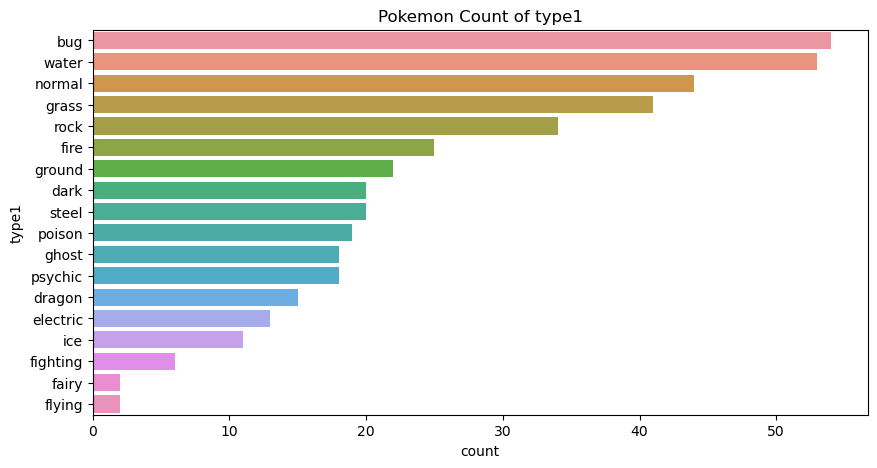

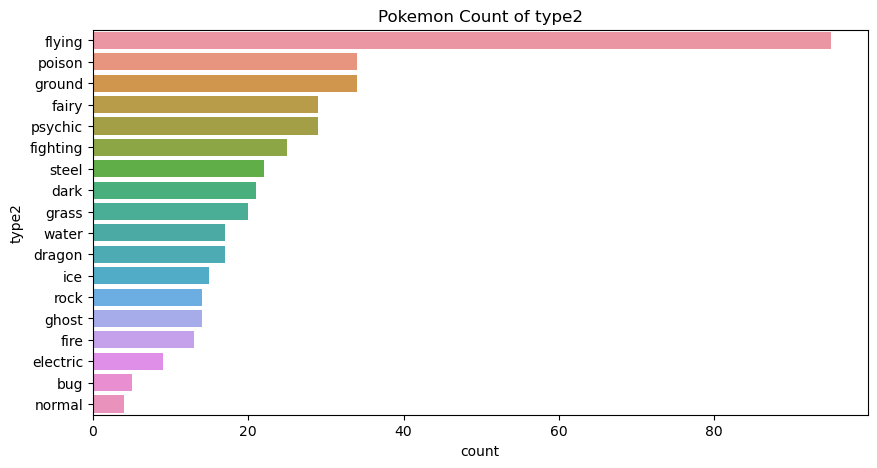

In [11]:
# Filter out records with 'None' in 'type2' column
filtered_df = df[df['type2'] != 'None']

# Plot count plot for 'type1'
plt.figure(figsize=(10, 5))
sns.countplot(y=filtered_df['type1'], order=filtered_df['type1'].value_counts().index)
plt.title('Pokemon Count of type1')
plt.show()

# Plot count plot for 'type2' excluding 'None'
plt.figure(figsize=(10, 5))
sns.countplot(y=filtered_df['type2'], order=filtered_df['type2'].value_counts().index)
plt.title('Pokemon Count of type2')
plt.show()

## Pokemons based on Classification

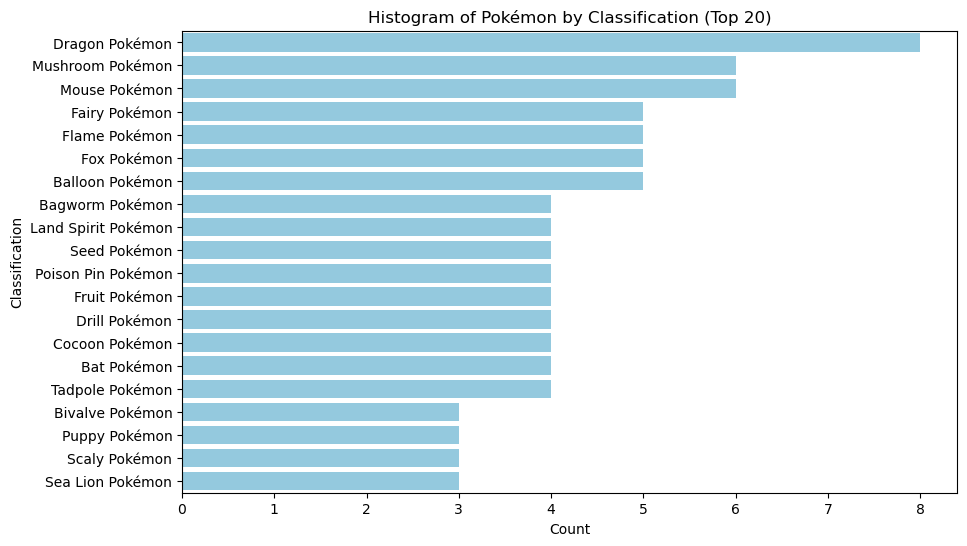

In [12]:
# Get the top 20 most frequent values in the 'classfication' column
top_classification = df['classfication'].value_counts().nlargest(20).index

# Filter the DataFrame to include only the top 20 classifications
filtered_df = df[df['classfication'].isin(top_classification)]

# Sort the filtered DataFrame by the count of each classification in descending order
filtered_df_sorted = filtered_df.groupby('classfication').size().sort_values(ascending=False).reset_index(name='count')

# Plot histogram for 'classfication' with only the top 20 values in descending order
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='classfication', data=filtered_df_sorted, color='skyblue')
plt.title('Histogram of Pokémon by Classification (Top 20)')
plt.xlabel('Count')
plt.ylabel('Classification')
plt.show()

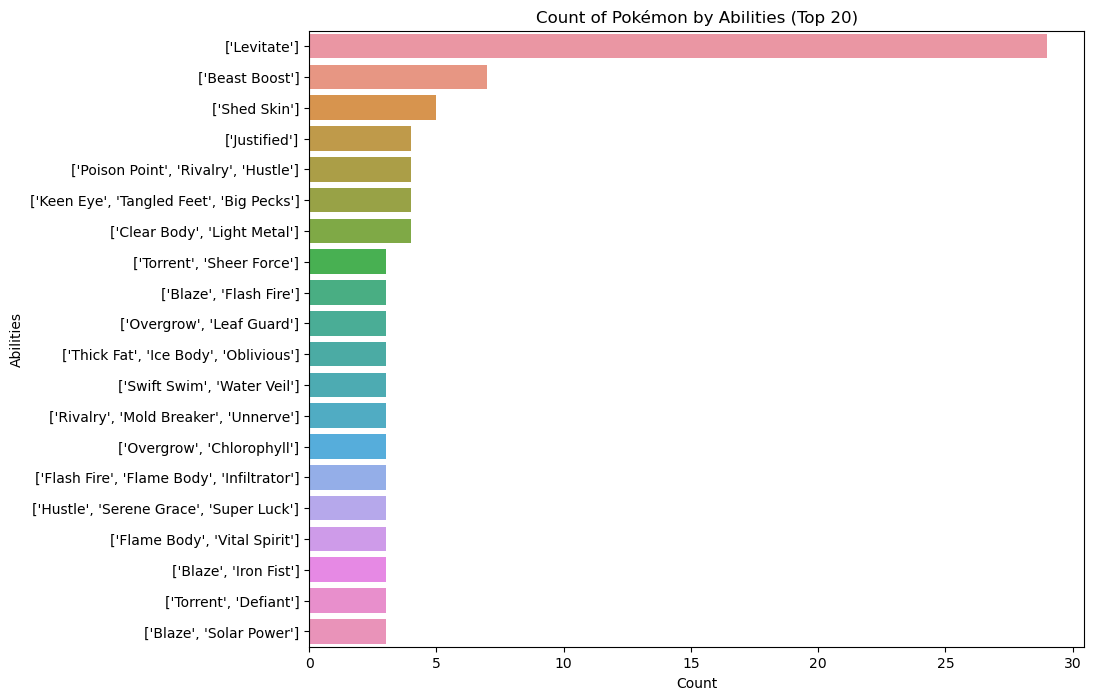

In [13]:
# Get the top 20 most frequent values in the 'abilities' column
top_abilities = df['abilities'].value_counts().nlargest(20).index

# Filter the DataFrame to include only the top 20 abilities
filtered_df = df[df['abilities'].isin(top_abilities)]

# Plot count plot for 'abilities' with only the top 20 values
plt.figure(figsize=(10, 8))
sns.countplot(y=filtered_df['abilities'], order=top_abilities)
plt.title('Count of Pokémon by Abilities (Top 20)')
plt.xlabel('Count')
plt.ylabel('Abilities')
plt.show()

## Creating composite metrics

In [14]:
# Create a composite metric for overall strength
df['battle_strength'] = df[['attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].sum(axis=1)

# Create additional metrics
df['offensive_strength'] = df[['attack', 'sp_attack']].mean(axis=1)
df['defensive_strength'] = df[['defense', 'sp_defense']].mean(axis=1)

# Identify all 'against_*' type columns
against_columns = [col for col in df.columns if col.startswith('against_')]

# Add a new column that averages all the 'against_*' type columns
df['average_against'] = df[against_columns].mean(axis=1)

# Verify the composite metrics
df[['name', 'battle_strength', 'offensive_strength', 'defensive_strength', 'average_against','speed','is_legendary']].head()

,name,battle_strength,offensive_strength,defensive_strength,average_against,speed,is_legendary
0,Bulbasaur,273,57.0,57.0,1.069444,45,0
1,Ivysaur,345,71.0,71.5,1.069444,60,0
2,Venusaur,545,111.0,121.5,1.069444,80,0
3,Charmander,270,56.0,46.5,1.000000,65,0
4,Charmeleon,347,72.0,61.5,1.000000,80,0


## Constructing correlation matrix

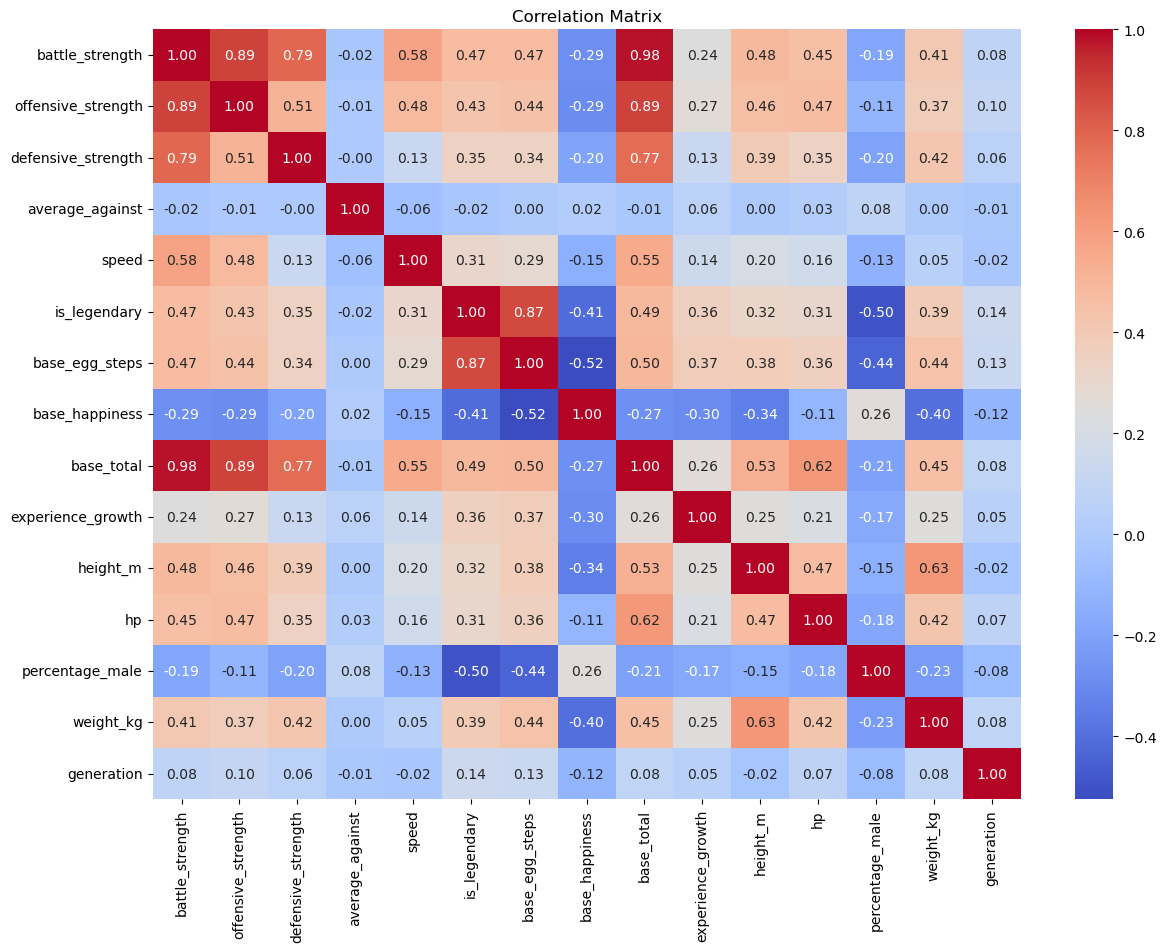

In [15]:
# Filter the DataFrame to include only the specified columns
selected_columns = ['battle_strength', 'offensive_strength', 'defensive_strength', 'average_against', 'speed', 'is_legendary', 'base_egg_steps', 'base_happiness', 'base_total', 'experience_growth', 'height_m', 'hp', 'percentage_male', 'weight_kg', 'generation']
filtered_df = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = filtered_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

## Optimization process

In [16]:
# Consider only relevant columns for base stats
base_stats = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

# Calculate total base stats
df['total_base_stats'] = df[base_stats].sum(axis=1)

# Select top Pokémon by base stats
top_pokemon = df.nlargest(20, 'total_base_stats')
top_pokemon[['name', 'total_base_stats']]

,name,total_base_stats
149,Mewtwo,780
383,Rayquaza,780
381,Kyogre,770
382,Groudon,770
492,Arceus,720
717,Zygarde,708
247,Tyranitar,700
372,Salamence,700
375,Metagross,700
379,Latias,700


In [17]:
# Analyze abilities
df['ability_count'] = df['abilities'].apply(lambda x: len(eval(x)))
top_abilities_pokemon = df.nlargest(20, 'ability_count')
top_abilities_pokemon[['name', 'abilities']]

,name,abilities
18,Rattata,"['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu..."
19,Raticate,"['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu..."
49,Diglett,"['Sand Veil', 'Arena Trap', 'Sand Force', 'San..."
50,Dugtrio,"['Sand Veil', 'Arena Trap', 'Sand Force', 'San..."
51,Meowth,"['Pickup', 'Technician', 'Unnerve', 'Pickup', ..."
52,Persian,"['Limber', 'Technician', 'Unnerve', 'Fur Coat'..."
73,Geodude,"['Rock Head', 'Sturdy', 'Sand Veil', 'Magnet P..."
74,Graveler,"['Rock Head', 'Sturdy', 'Sand Veil', 'Magnet P..."
75,Golem,"['Rock Head', 'Sturdy', 'Sand Veil', 'Magnet P..."
87,Grimer,"['Stench', 'Sticky Hold', 'Poison Touch', 'Poi..."


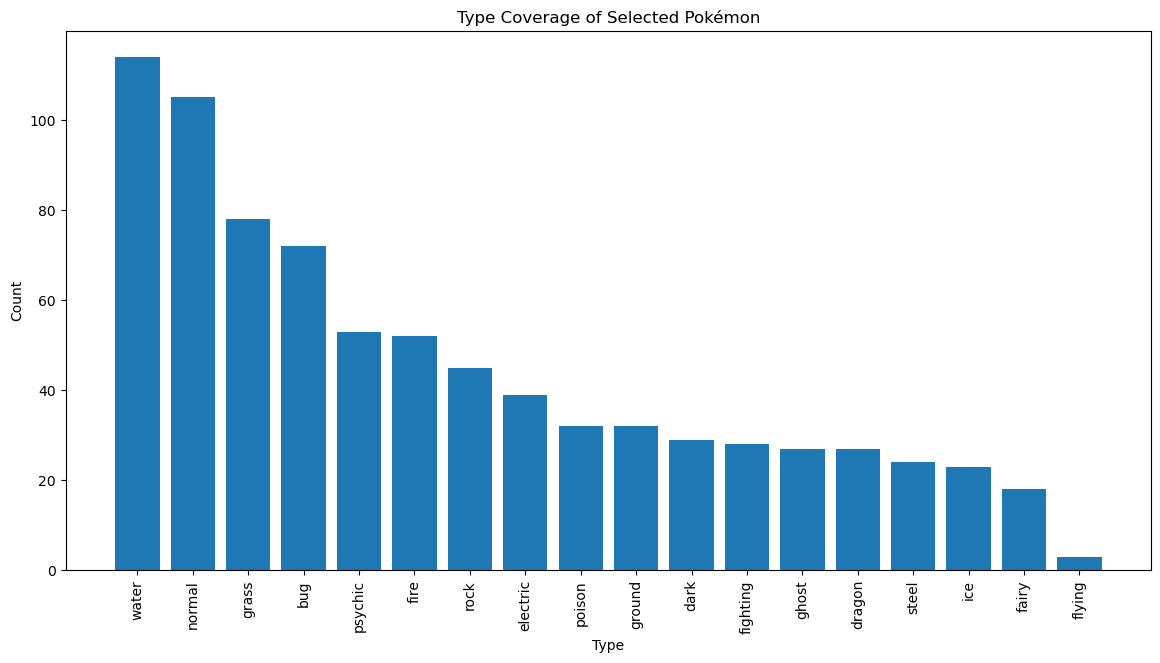

In [18]:
# Visualize type coverage
types = df['type1'].value_counts().index
counts = df['type1'].value_counts().values

plt.figure(figsize=(14, 7))
plt.bar(types, counts)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Type Coverage of Selected Pokémon')
plt.xticks(rotation=90)
plt.show()

## Calculating synergy scores

In [19]:
# Define a function to calculate synergy scores
def calculate_synergy(team):
    synergy_score = 0
    for i, pokemon in team.iterrows():
        for j, other_pokemon in team.iterrows():
            if i != j:
                synergy_score += 1 / (1 + abs(pokemon['battle_strength'] - other_pokemon['battle_strength']))
    return synergy_score / len(team)


# Example team synergy calculation
team = df.sample(6)
print("Synergy Score:", calculate_synergy(team))

Synergy Score: 0.12764435343606298


## Team optimisation

In [20]:
# Define a function to evaluate a team
def evaluate_team(team):
    team_df = df[df['name'].isin(team)]
    battle_strength = team_df['battle_strength'].sum()
    offensive_strength = team_df['offensive_strength'].sum()
    defensive_strength = team_df['defensive_strength'].sum()
    synergy_score = calculate_synergy(team_df)
    return battle_strength, offensive_strength, defensive_strength, synergy_score

# Generate all possible combinations of 6 Pokémon (optimized with random sampling)
def optimize_team(pokemon_names, num_teams=1000):
    best_team = None
    best_score = -np.inf

    for _ in range(num_teams):
        team = np.random.choice(pokemon_names, 6, replace=False)
        battle_strength, offensive_strength, defensive_strength, synergy_score = evaluate_team(team)
        overall_score = battle_strength + offensive_strength + defensive_strength + synergy_score
        if overall_score > best_score:
            best_score = overall_score
            best_team = team

    return best_team, best_score

pokemon_names = df['name'].tolist()
best_team, best_score = optimize_team(pokemon_names)

print("Best Team:", best_team)
print("Best Score:", best_score)

Best Team: ['Kyogre' 'Stoutland' 'Mamoswine' 'Sharpedo' 'Necrozma' 'Kingdra']
Best Score: 4185.139383273339


## Evaluation and validation

In [21]:
# Define some known effective teams for comparison
known_teams = [
    ['Bulbasaur', 'Charmander', 'Squirtle', 'Pikachu', 'Jigglypuff', 'Meowth'],
    # Add more known teams as needed
]

# Evaluate known teams
for team in known_teams:
    battle_strength, offensive_strength, defensive_strength, synergy_score = evaluate_team(team)
    overall_score = battle_strength + offensive_strength + defensive_strength + synergy_score
    print(f"Team: {team} - Score: {overall_score}")

Team: ['Bulbasaur', 'Charmander', 'Squirtle', 'Pikachu', 'Jigglypuff', 'Meowth'] - Score: 2078.636766870571


## Visualisation

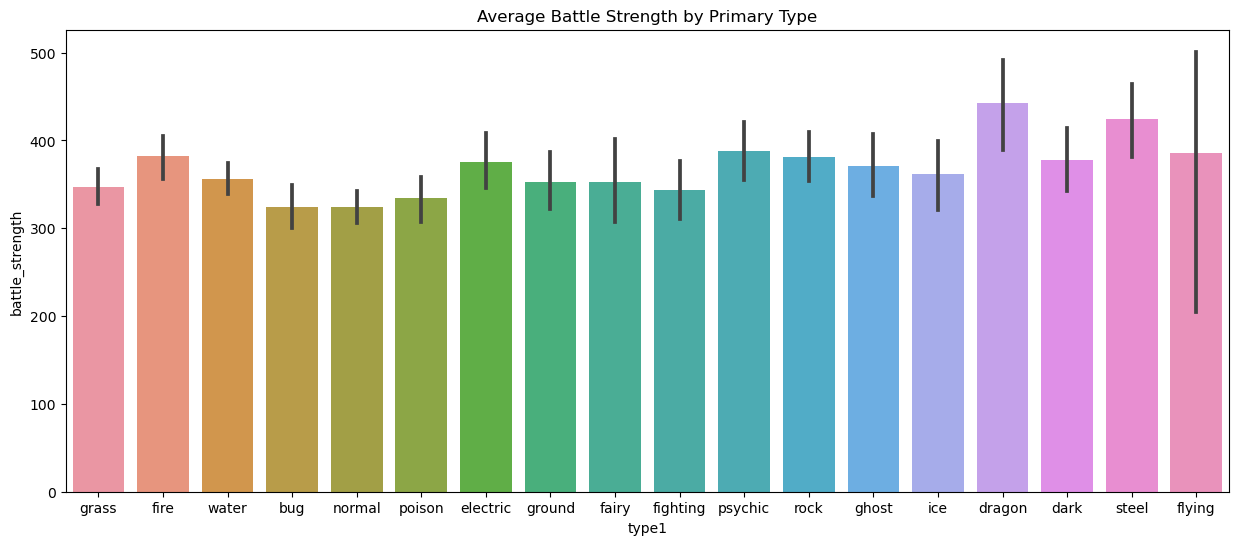

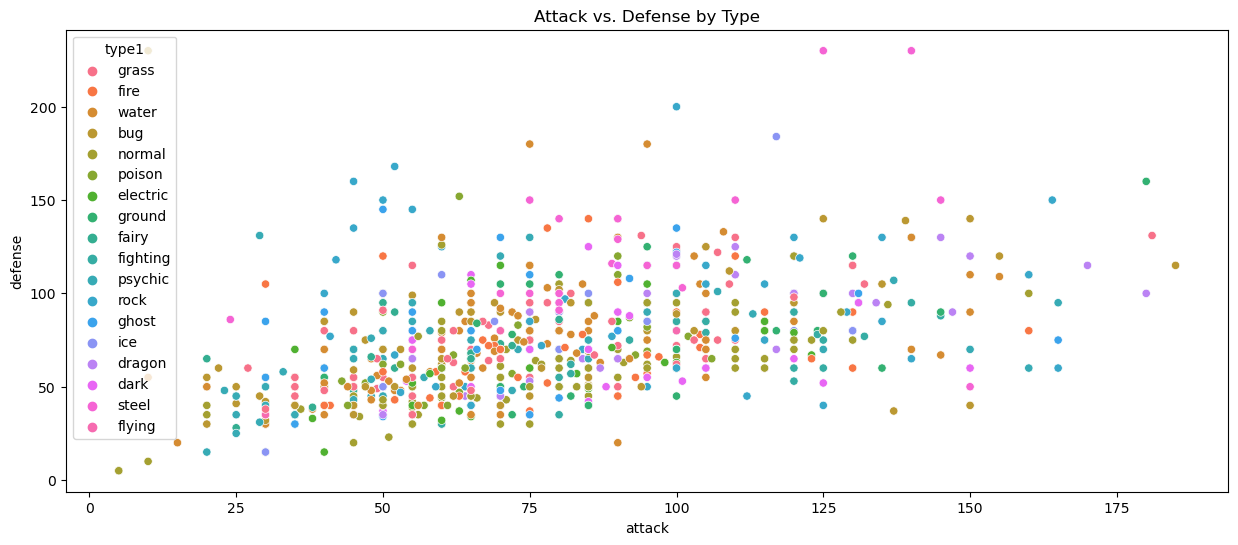

In [22]:
# Example visualizations
plt.figure(figsize=(15, 6))
sns.barplot(x='type1', y='battle_strength', data=df)
plt.title('Average Battle Strength by Primary Type')
plt.show()

plt.figure(figsize=(15, 6))
sns.scatterplot(x='attack', y='defense', hue='type1', data=df)
plt.title('Attack vs. Defense by Type')
plt.show()

## Distribution of base stats across Pokemon types

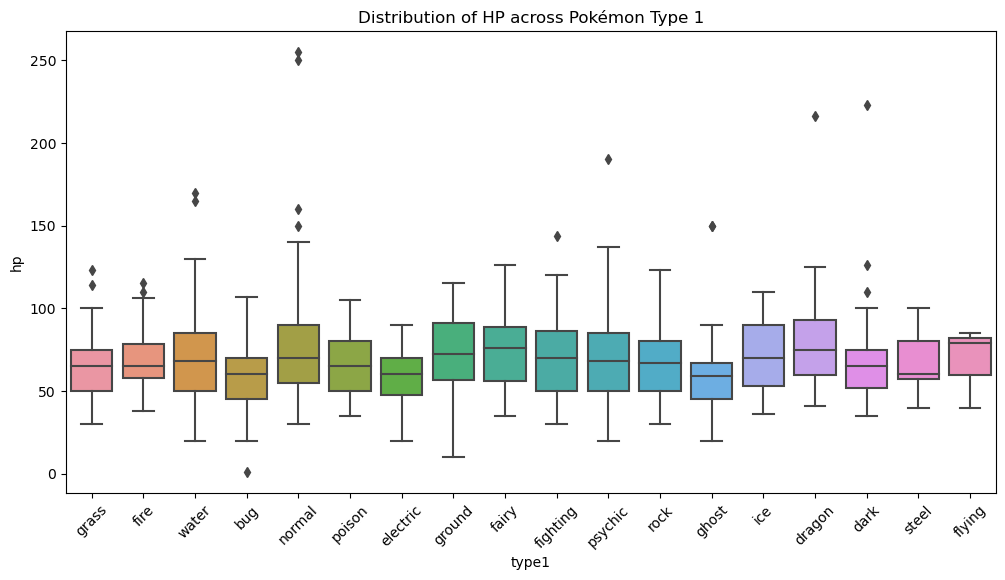

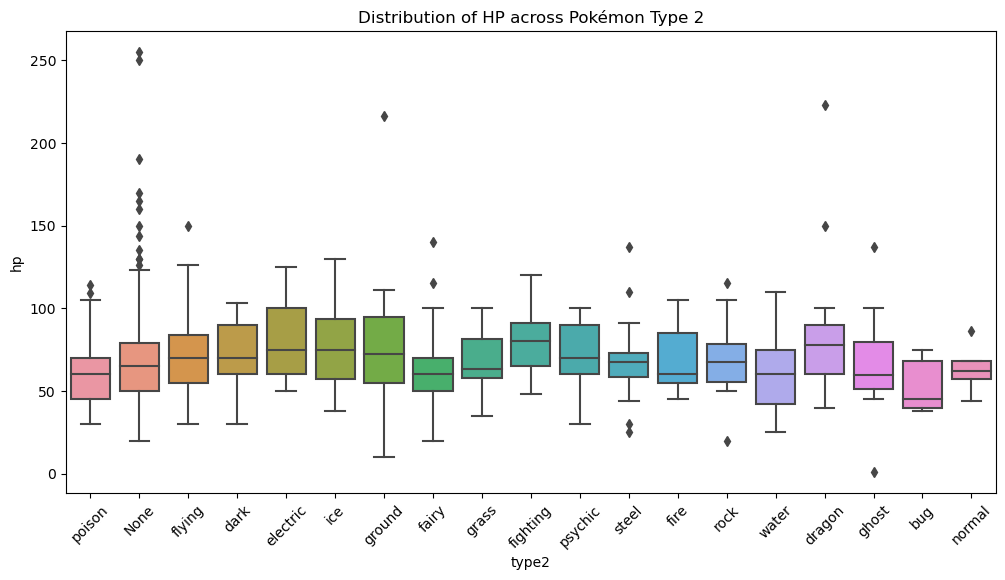

In [23]:
# Plotting base stats distribution across different types
plt.figure(figsize=(12, 6))
sns.boxplot(x='type1', y='hp', data=df)
plt.title('Distribution of HP across Pokémon Type 1')
plt.xticks(rotation=45)
plt.show()

# Plotting base stats distribution across different types
plt.figure(figsize=(12, 6))
sns.boxplot(x='type2', y='hp', data=df)
plt.title('Distribution of HP across Pokémon Type 2')
plt.xticks(rotation=45)
plt.show()

## Predictive modelling

In [24]:
# Encode categorical features
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [25]:
X = df.drop(['is_legendary','abilities','japanese_name','name'],axis=1)
y = df['is_legendary']

In [26]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
# Make predictions
y_pred = model.predict(X_test)

In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [30]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.99
Precision: 1.00
Recall: 0.94
F1 Score: 0.97


In [31]:
# Feature Importances
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

In [32]:
print(feature_importances)

               feature  importance
19      base_egg_steps    0.228588
22        capture_rate    0.203558
41    total_base_stats    0.083560
21          base_total    0.081375
28     percentage_male    0.061254
37     battle_strength    0.045736
20      base_happiness    0.040251
26            height_m    0.031013
42       ability_count    0.026179
29      pokedex_number    0.025244
25   experience_growth    0.019434
38  offensive_strength    0.015228
30           sp_attack    0.014373
27                  hp    0.013742
39  defensive_strength    0.012510
32               speed    0.010923
35           weight_kg    0.010420
36          generation    0.008134
31          sp_defense    0.007374
18              attack    0.006949
23       classfication    0.006589
24             defense    0.005842
8        against_ghost    0.005498
5        against_fight    0.004764
4        against_fairy    0.003267
40     average_against    0.003194
14     against_psychic    0.003081
33               typ

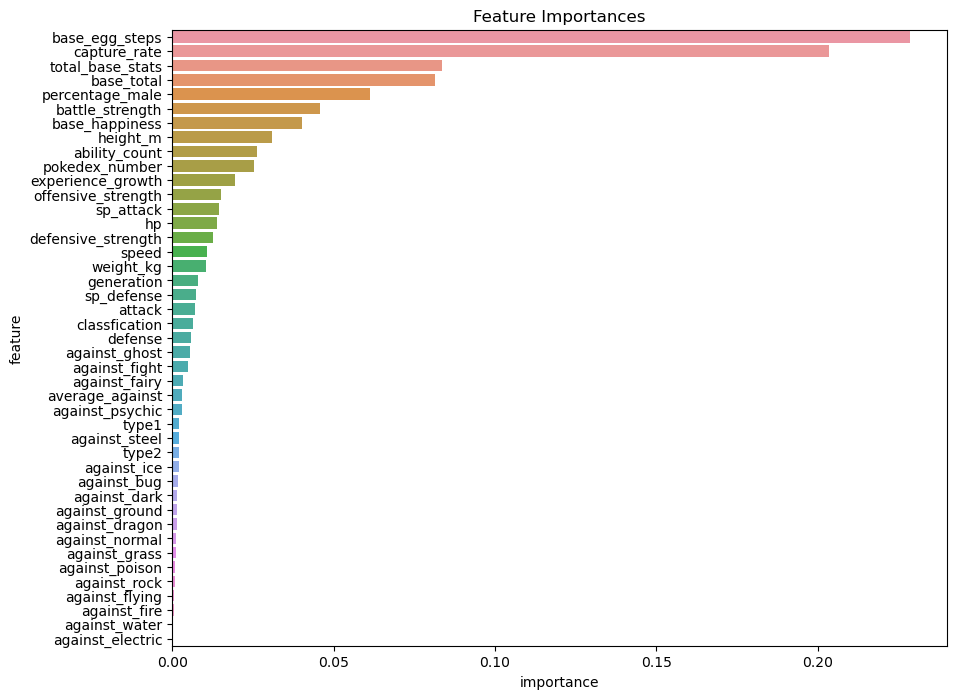

In [33]:
# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

# More insightful EDA

## Differences in base stats between generations

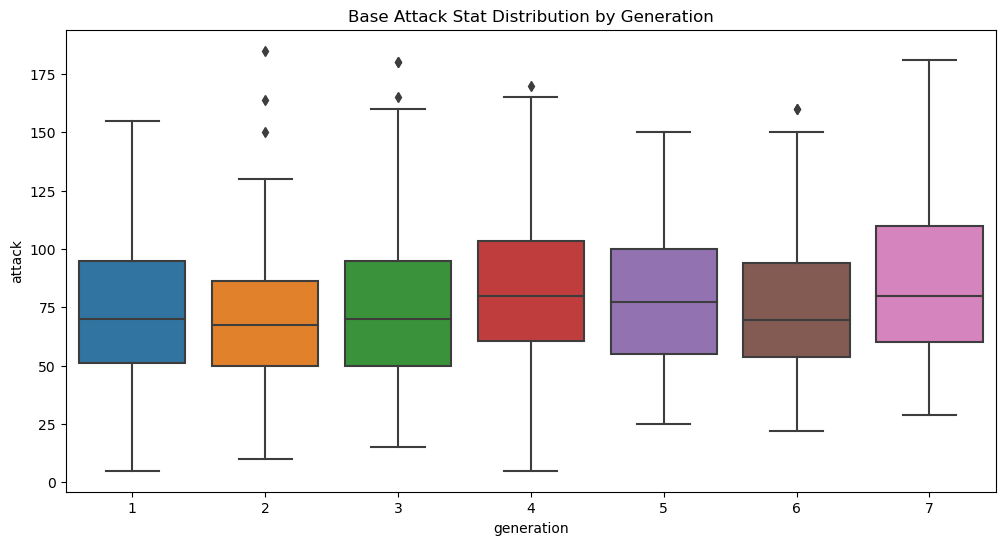

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='generation', y='attack', data=df)
plt.title('Base Attack Stat Distribution by Generation')
plt.show()

## Common primary and secondary types among all Pokemon

In [35]:
# Counting primary types
primary_types = df['type1'].value_counts()

# Counting secondary types
secondary_types = df['type2'].value_counts()

In [36]:
# Displaying the most common types
print("Most common primary types:\n")
primary_types.head()

Most common primary types:



type1
17    114
12    105
9      78
0      72
14     53
Name: count, dtype: int64

In [37]:
# Displaying the most common types
print("Most common secondary types:\n")
secondary_types.head()

Most common secondary types:



type2
0     384
8      95
14     34
11     34
15     29
Name: count, dtype: int64

## Relationship between Heights and weights of Pokemon across different types and generations

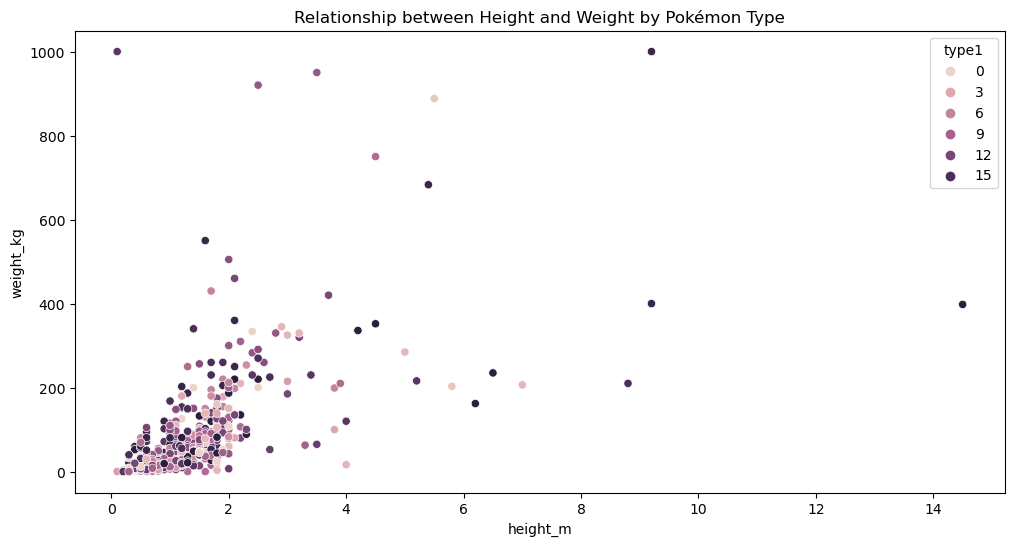

In [38]:
# Plotting heights and weights by type or generation
plt.figure(figsize=(12, 6))
sns.scatterplot(x='height_m', y='weight_kg', hue='type1', data=df)
plt.title('Relationship between Height and Weight by Pokémon Type')
plt.show()

## Trends in the capture rates of Pokemon

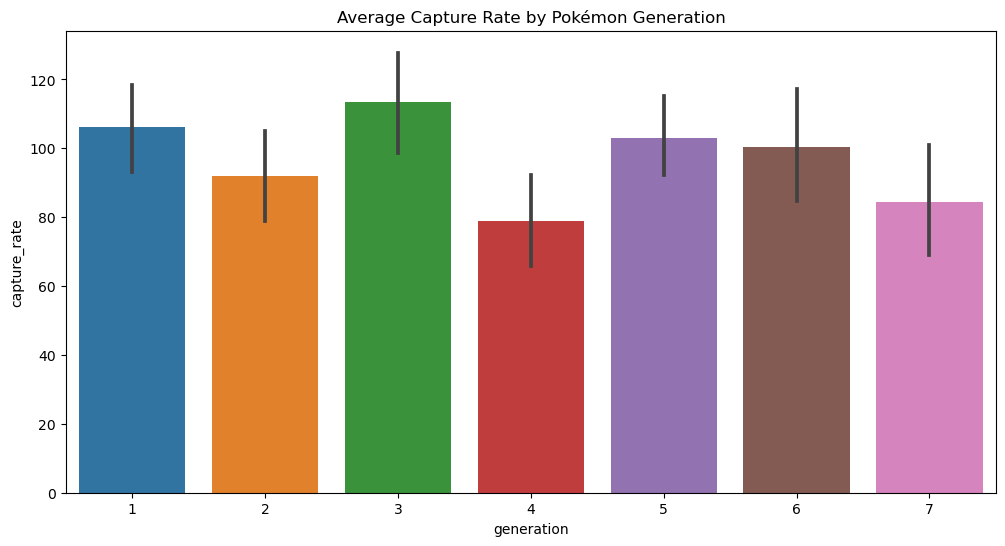

In [39]:
# Assuming 'Capture Rate' is a column in your dataset
# Plotting capture rates by generation or type
plt.figure(figsize=(12, 6))
sns.barplot(x='generation', y='capture_rate', data=df)
plt.title('Average Capture Rate by Pokémon Generation')
plt.show()

## Base stats of legendary Pokemon compared to non-legendary Pokemon

In [40]:
# Assuming 'Legendary' is a boolean column indicating if a Pokémon is legendary
legendary_stats = df.groupby('is_legendary').mean()[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']]

# Displaying the comparison
print("Average stats comparison (legendary vs non-legendary):\n", legendary_stats)

Average stats comparison (legendary vs non-legendary):
                      hp      attack    defense   sp_attack  sp_defense  \
is_legendary                                                             
0             66.424077   74.841313  70.481532   67.240766   67.945280   
1             95.428571  109.357143  99.400000  113.757143  101.885714   

                  speed  
is_legendary             
0             63.548564  
1             95.428571  


## Relationships between different base stats

C:\Users\TSA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

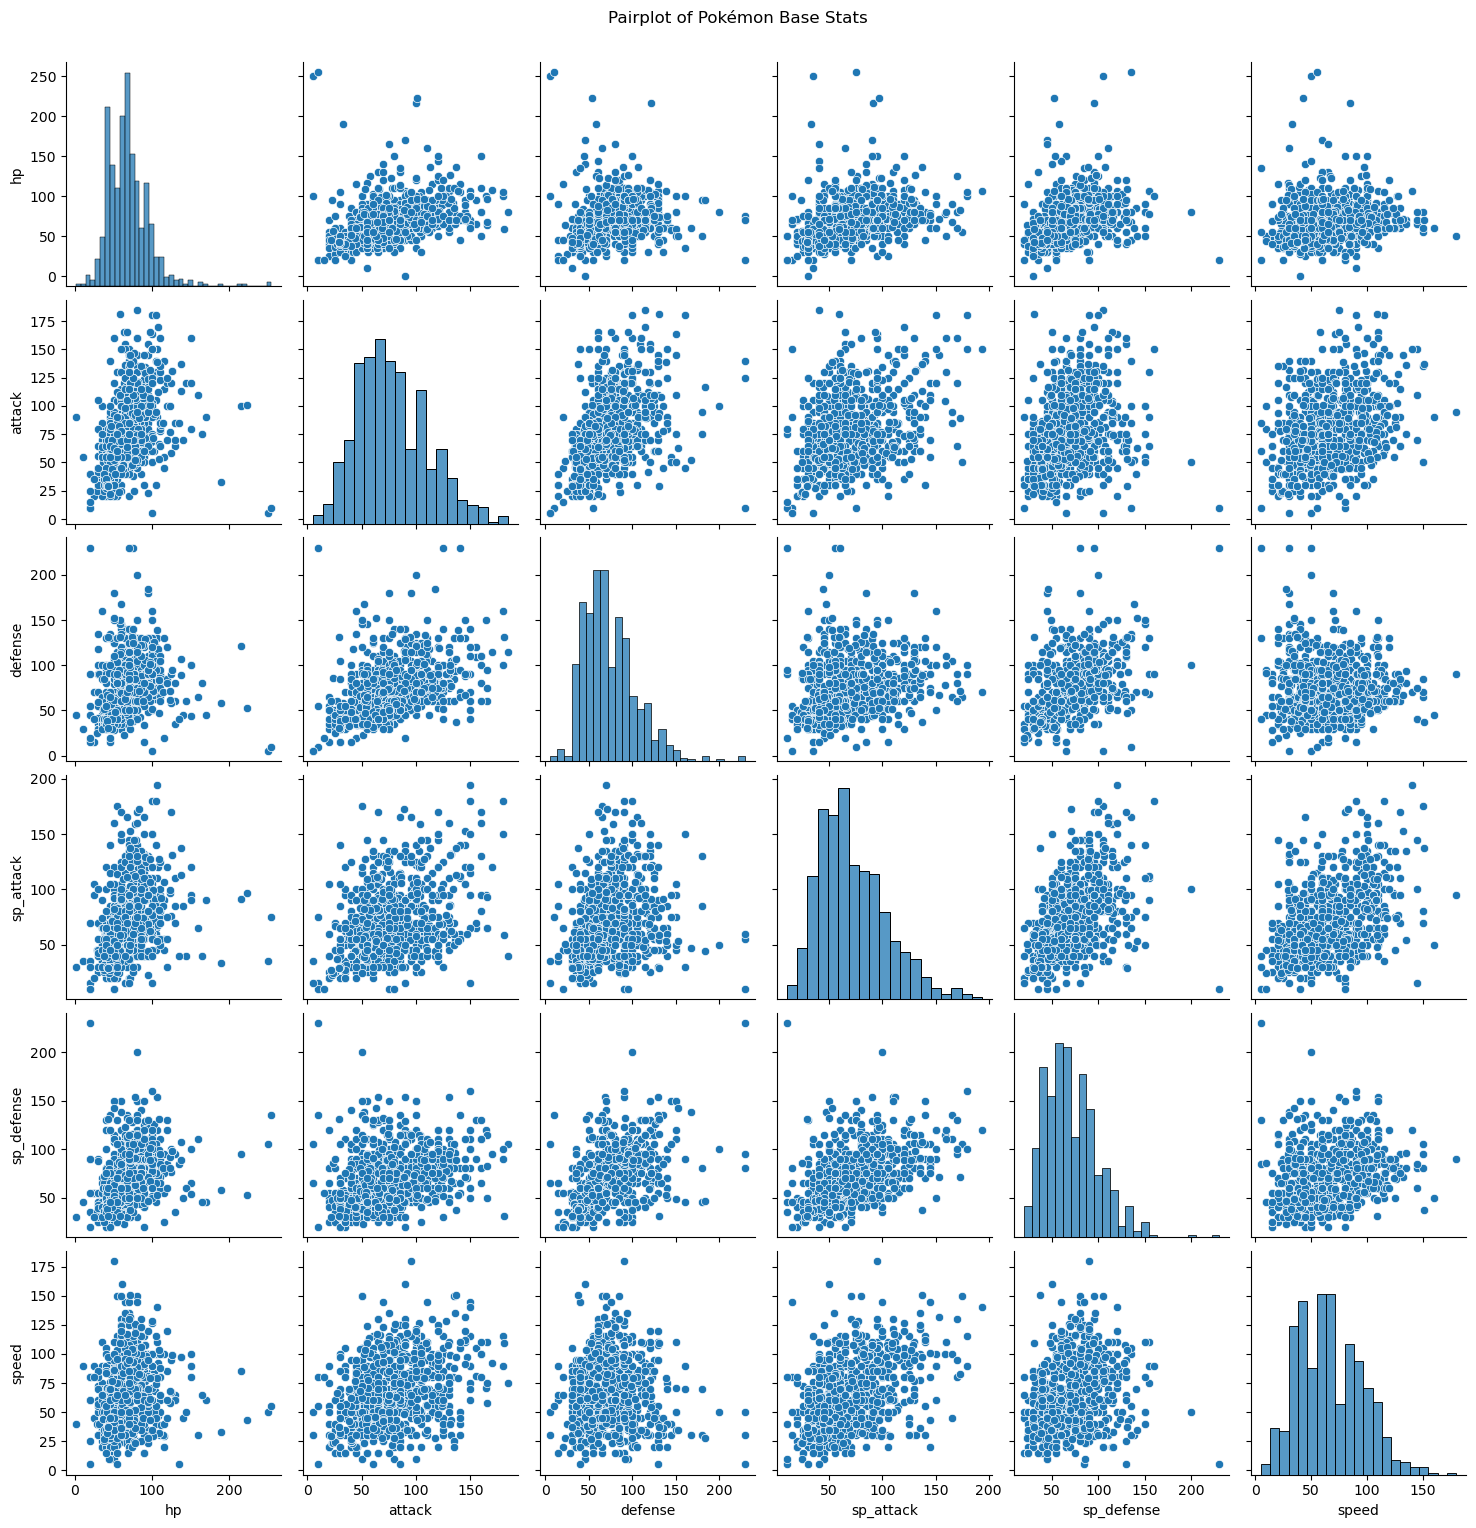

In [41]:
# Plotting relationships between different base stats
plt.figure(figsize=(10, 8))
sns.pairplot(df[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']])
plt.suptitle('Pairplot of Pokémon Base Stats', y=1.02)
plt.show()

## Impact of different abilities on the overall effectiveness of Pokemon in battles

In [42]:
# Example calculation of hypothetical Battle Effectiveness
df['BattleEffectiveness'] = (
    df['hp'] +
    df['attack'] +
    df['defense'] +
    df['sp_attack'] +
    df['sp_defense'] +
    df['speed']
    # Add additional factors or adjust weights as necessary
)

In [43]:
# Assuming you have a dataset with abilities and battle effectiveness metrics
# Analyzing impact of abilities on battle effectiveness
ability_effectiveness = df.groupby('abilities').mean()['BattleEffectiveness']

# Displaying top impactful abilities
print("Top impactful abilities:\n", ability_effectiveness.sort_values(ascending=False).head())

Top impactful abilities:
 abilities
2      780.0
72     770.0
73     770.0
223    720.0
5      708.0
Name: BattleEffectiveness, dtype: float64
